In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://www.worldometers.info/geography/alphabetical-list-of-countries/'

r=requests.get(url)
r

<Response [200]>

In [5]:
html=r.text
soup=BeautifulSoup(html,'html.parser')
soup.title.text

'List of Countries of the world in alphabetical order (A to Z) - Worldometer'

In [7]:
table_body=soup.find('tbody')
table_rows=table_body.find_all('tr')


In [12]:
dct={
    'countries' : [],
    'population' : [],
    'area' : [],
    'density' : []
}


for row in table_rows:
    d=row.find_all('td')
    dct['countries'].append(d[1].text)
    dct['population'].append(d[2].text)
    dct['area'].append(d[3].text)
    dct['density'].append(d[4].text)
    
  

In [13]:
print(dct)  

{'countries': ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei ', 'Bulgaria', 'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. "Swaziland")', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Hondur

In [17]:
indices=[i for i in range(1,len(dct['countries'])+1)]
df=pd.DataFrame(dct,index=indices)
df

,countries,population,area,density
1,Afghanistan,"38,928,346","652,860",60
2,Albania,"2,877,797","27,400",105
3,Algeria,"43,851,044","2,381,740",18
4,Andorra,"77,265",470,164
5,Angola,"32,866,272","1,246,700",26
...,...,...,...,...
191,Venezuela,"28,435,940","882,050",32
192,Vietnam,"97,338,579","310,070",314
193,Yemen,"29,825,964","527,970",56
194,Zambia,"18,383,955","743,390",25


In [18]:
#generating csv file#

df.to_csv('Demographic-data.csv')

In [20]:
#Preprocessing#
def remove_comma(x):
    return int(x.replace(',',''))


123234678765

In [22]:
data=df
data['pops']=data['population'].apply(lambda x : remove_comma(x))
data['areasq']=data['area'].apply(lambda x : remove_comma(x))
data['dens']=data['density'].apply(lambda x : remove_comma(x))
data

,countries,population,area,density,pops,areasq,dens
1,Afghanistan,"38,928,346","652,860",60,38928346,652860,60
2,Albania,"2,877,797","27,400",105,2877797,27400,105
3,Algeria,"43,851,044","2,381,740",18,43851044,2381740,18
4,Andorra,"77,265",470,164,77265,470,164
5,Angola,"32,866,272","1,246,700",26,32866272,1246700,26
...,...,...,...,...,...,...,...
191,Venezuela,"28,435,940","882,050",32,28435940,882050,32
192,Vietnam,"97,338,579","310,070",314,97338579,310070,314
193,Yemen,"29,825,964","527,970",56,29825964,527970,56
194,Zambia,"18,383,955","743,390",25,18383955,743390,25


In [23]:
#Finding countries all countries with initial letter M(or any letter)#

for i in data['countries']:
    if i.startswith('M'):
        print(i)

Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Myanmar (formerly Burma)


In [29]:
#sorting the countries on the basis of population#

top_populated=data.sort_values('pops',ascending=False).head(10)
top_populated

,countries,population,area,density,pops,areasq,dens
37,China,"1,439,323,776","9,388,211",153,1439323776,9388211,153
78,India,"1,380,004,385","2,973,190",464,1380004385,2973190,464
187,United States of America,"331,002,651","9,147,420",36,331002651,9147420,36
79,Indonesia,"273,523,615","1,811,570",151,273523615,1811570,151
132,Pakistan,"220,892,340","770,880",287,220892340,770880,287
24,Brazil,"212,559,417","8,358,140",25,212559417,8358140,25
127,Nigeria,"206,139,589","910,770",226,206139589,910770,226
14,Bangladesh,"164,689,383","130,170","1,265",164689383,130170,1265
144,Russia,"145,934,462","16,376,870",9,145934462,16376870,9
111,Mexico,"128,932,753","1,943,950",66,128932753,1943950,66


In [31]:
#calculating total population#

print(sum(data['pops']))
print(sum(top_populated['pops']))

7755132101
4503002371


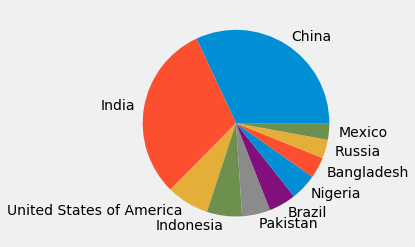

In [35]:
#population graph#
plt.style.use('fivethirtyeight')
plt.pie(top_populated['pops'],labels=top_populated['countries'])
plt.show()

In [38]:
#countries with max and min area#

data[data['areasq']==data['areasq'].max()]


,countries,population,area,density,pops,areasq,dens
144,Russia,"145,934,462","16,376,870",9,145934462,16376870,9


In [39]:
data[data['areasq']==data['areasq'].min()]

,countries,population,area,density,pops,areasq,dens
74,Holy See,801,0,"2,003",801,0,2003


In [41]:
#country with max and least population density#
data[data['dens']==data['dens'].max()]

,countries,population,area,density,pops,areasq,dens
114,Monaco,"39,242",1,"26,337",39242,1,26337


In [42]:
data[data['dens']==data['dens'].min()]

,countries,population,area,density,pops,areasq,dens
115,Mongolia,"3,278,290","1,553,560",2,3278290,1553560,2


In [44]:
#sorting countries according to density#
top_densed=data.sort_values('dens',ascending=False).head(10)
top_densed

,countries,population,area,density,pops,areasq,dens
114,Monaco,"39,242",1,"26,337",39242,1,26337
157,Singapore,"5,850,342",700,"8,358",5850342,700,8358
13,Bahrain,"1,701,575",760,"2,239",1701575,760,2239
74,Holy See,801,0,"2,003",801,0,2003
105,Maldives,"540,544",300,"1,802",540544,300,1802
107,Malta,"441,543",320,"1,380",441543,320,1380
14,Bangladesh,"164,689,383","130,170","1,265",164689383,130170,1265
134,Palestine State,"5,101,414","6,020",847,5101414,6020,847
15,Barbados,"287,375",430,668,287375,430,668
95,Lebanon,"6,825,445","10,230",667,6825445,10230,667


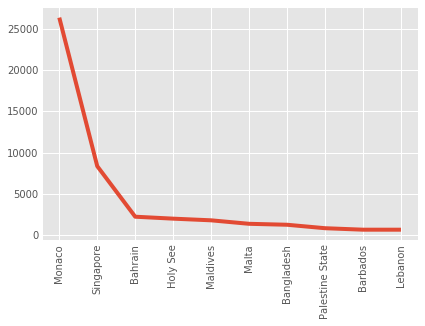

In [47]:
#plotting graph#

plt.style.use('ggplot')
plt.plot(top_densed['countries'],top_densed['dens'])
plt.xticks(rotation=90)
plt.show()